# Exercise: Handling Imbalanced Data and Augmentation


`#scikit-learn` `#imbalanced-data` `#undersampling` `#image-augmentation`


> Objectives:
>
> - Handle imbalanced data using undersampling techniques
> - Train and evaluate models on undersampled data
> - Learn basic image augmentation techniques using PIL and visualize transformations


## Standard Deep Atlas Exercise Set Up


- [x] Ensure you are using the coursework Pipenv environment and kernel ([instructions](../SETUP.md))
- [x] Apply the standard Deep Atlas environment setup process by running this cell:


In [26]:
import sys, os
sys.path.insert(0, os.path.join('..', 'includes'))

import deep_atlas
from deep_atlas import FILL_THIS_IN
deep_atlas.initialize_environment()
if deep_atlas.environment == 'COLAB':
    %pip install -q python-dotenv==1.0.0

🎉 Running in a Virtual environment


## 🚦 Checkpoint: Start


- [x] Run this cell to record your start time:


In [27]:
deep_atlas.log_start_time()

🚀 Success! Get started...


## Context


Imbalanced datasets are common in real-world machine learning problems, where some classes significantly outnumber others. This imbalance can cause models to perform poorly on the minority class, which is often the class of most interest.

In this exercise, we will:

1. Simulate an imbalanced dataset.
2. Apply undersampling to handle the class imbalance.
3. Train and evaluate a machine learning model on the balanced dataset.
4. Learn and apply image augmentation techniques using **PIL** to enrich image datasets.


## Imports


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
from PIL import Image, ImageDraw, ImageFont, ImageOps, ImageEnhance
import os

## Simulating Imbalanced Data


We will simulate a dataset with imbalanced classes, where one class significantly outnumbers another.

- [x] Run this cell to generate the dataset:


In [29]:
# Simulating an imbalanced dataset
data = {
    "feature1": np.random.randn(1000),
    "feature2": np.random.randn(1000),
    "feature3": np.random.randn(1000),
    "target": np.concatenate(
        [np.zeros(950), np.ones(50)]
    ),  # Imbalanced classes
}
df = pd.DataFrame(data)

- [x] Visualize the class distribution of the dataset:


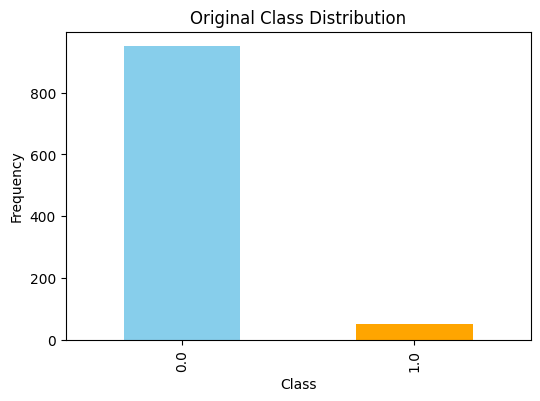

In [30]:
def plot_class_distribution(df, title):
    plt.figure(figsize=(6, 4))
    df["target"].value_counts().plot(
        kind="bar", color=["skyblue", "orange"]
    )
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()


plot_class_distribution(df, "Original Class Distribution")

## Undersampling the Majority Class


We will now apply **undersampling** to reduce the size of the majority class and create a balanced dataset.

- [x] Apply undersampling:


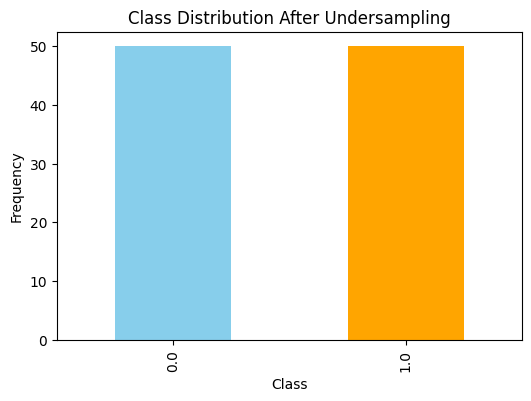

In [31]:
# Resample the majority class to balance the dataset
df_majority = df[df.target == 0]
df_minority = df[df.target == 1]

df_majority_downsampled = resample(
    df_majority, replace=False, n_samples=len(df_minority), random_state=42
)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

plot_class_distribution(
    df_downsampled, "Class Distribution After Undersampling"
)

## Splitting the Data


We will split the data into training and testing sets using an 80/20 split.

- [x] Split the dataset:


In [32]:
X_downsampled = df_downsampled.drop("target", axis=1)
y_downsampled = df_downsampled["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X_downsampled, y_downsampled, test_size=0.3, random_state=42
)

## Training a RandomForest Classifier


We will now train a **RandomForestClassifier** on the balanced dataset and evaluate its performance.

- [x] Train and evaluate the model:


In [33]:
# Train a RandomForest model
model_downsampled = RandomForestClassifier(random_state=42)
model_downsampled.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_downsampled = model_downsampled.predict(X_test)
print(
    f"\nClassification Report (Undersampled):\n{classification_report(y_test, y_pred_downsampled)}"
)


Classification Report (Undersampled):
              precision    recall  f1-score   support

         0.0       0.45      0.29      0.36        17
         1.0       0.37      0.54      0.44        13

    accuracy                           0.40        30
   macro avg       0.41      0.42      0.40        30
weighted avg       0.42      0.40      0.39        30



## Bonus: Image Augmentation


In this section, we will learn basic **image augmentation** techniques using **PIL**. These techniques include rotation, flipping, and brightness enhancement.

- [x] Generate an image with some content and save it:


In [34]:
# Create a blank white image with some content (rectangle and text)
image = Image.new("RGB", (224, 224), color="white")

# Add a rectangle and some text to the image
draw = ImageDraw.Draw(image)

# Draw a blue rectangle
draw.rectangle(
    [50, 50, 150, 150], outline="blue", width=5, fill="lightblue"
)

# Add text (adjust font path if necessary)
font = ImageFont.load_default()
draw.text((60, 160), "Test", fill="black", font=font)

# Save the original image
image_path = os.path.join("downloads", "example_image.jpg")
os.makedirs("downloads", exist_ok=True)
image.save(image_path)

print(f"Image saved at {image_path}")

Image saved at downloads/example_image.jpg


- [x] Apply image augmentations:


In [35]:
# Define augmentation techniques using PIL
def augment_image_pil(image):
    augmented_images = []

    # Original image
    augmented_images.append(image)

    # Rotate image
    rotated_image = image.rotate(30)
    augmented_images.append(rotated_image)

    # Flip image horizontally
    flipped_image = ImageOps.mirror(image)
    augmented_images.append(flipped_image)

    # Enhance image brightness
    enhancer = ImageEnhance.Brightness(image)
    brightened_image = enhancer.enhance(1.5)
    augmented_images.append(brightened_image)

    return augmented_images

- [x] Visualize the original and augmented images side-by-side:


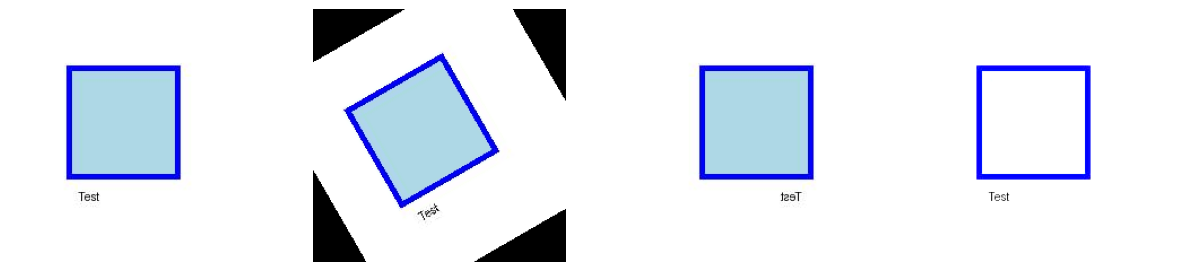

In [36]:
# Visualize the original and augmented images side-by-side
def visualize_augmented_images_pil(image_path):
    image = Image.open(image_path)
    augmented_images = augment_image_pil(image)

    fig, axes = plt.subplots(1, len(augmented_images), figsize=(15, 5))

    for i, img in enumerate(augmented_images):
        axes[i].imshow(img)
        axes[i].axis("off")

    plt.show()


# Display the augmentations
visualize_augmented_images_pil(image_path)

### 🚦 Checkpoint: Stop


- [x] Complete the feedback form and run the following cell to log your stop time:


In [39]:
# deep_atlas.log_feedback(
#     {
#         # How long were you actively focused on this section? (HH:MM)
#         "active_time": 00:20,
#         # Did you feel finished with this section (Yes/No):
#         "finished": yes,
#         # How much did you enjoy this section? (1–5)
#         "enjoyment": 4,
#         # How useful was this section? (1–5)
#         "usefulness": 4,
#         # Did you skip any steps?
#         "skipped_steps": no,
#         # Any obvious opportunities for improvement?
#         "suggestions": [],
#     }
# )
# deep_atlas.log_stop_time()

## You did it!


In this exercise, you learned how to handle imbalanced data using undersampling, trained a machine learning model on the balanced dataset, and applied basic image augmentation techniques using PIL. This knowledge is essential for improving model performance on imbalanced data and enriching image datasets.
